## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [1]:
!head Data/countries_info.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [58]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [59]:
# Write your code here
countries_data_df = pd.read_csv(COUNTRIES_DATASET)
happiness_data_df = pd.read_csv(HAPPINESS_DATASET)

print(countries_data_df)
print(happiness_data_df)

    country_name     area  population literacy
0    afghanistan   647500    31056997     36,0
1        albania    28748     3581655     86,5
2        algeria  2381740    32930091     70,0
3      argentina  2766890    39921833     97,1
4        armenia    29800     2976372     98,6
..           ...      ...         ...      ...
130    venezuela   912050    25730435     93,4
131      vietnam   329560    84402966     90,3
132        yemen   527970    21456188     50,2
133       zambia   752614    11502010     80,6
134     zimbabwe   390580    12236805     90,7

[135 rows x 4 columns]
         country  happiness_score  social_support  healthy_life_expectancy  \
0    Afghanistan           2.5669        0.470367                52.590000   
1        Albania           4.8827        0.671070                68.708138   
2        Algeria           5.0051        0.803385                65.905174   
3      Argentina           5.9747        0.900568                68.803802   
4        Armenia      

## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [60]:
countries_data_df=countries_data_df.rename(columns={'country_name' : 'country'})
print(countries_data_df)

happiness_data_df['country'] = happiness_data_df['country'].str.lower()
print(happiness_data_df.head())

combined = pd.merge(countries_data_df, happiness_data_df, on='country', how='inner')
print(combined.head())


         country     area  population literacy
0    afghanistan   647500    31056997     36,0
1        albania    28748     3581655     86,5
2        algeria  2381740    32930091     70,0
3      argentina  2766890    39921833     97,1
4        armenia    29800     2976372     98,6
..           ...      ...         ...      ...
130    venezuela   912050    25730435     93,4
131      vietnam   329560    84402966     90,3
132        yemen   527970    21456188     50,2
133       zambia   752614    11502010     80,6
134     zimbabwe   390580    12236805     90,7

[135 rows x 4 columns]
       country  happiness_score  social_support  healthy_life_expectancy  \
0  afghanistan           2.5669        0.470367                52.590000   
1      albania           4.8827        0.671070                68.708138   
2      algeria           5.0051        0.803385                65.905174   
3    argentina           5.9747        0.900568                68.803802   
4      armenia           4.6768 

## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [61]:
combined.sort_values(by='happiness_score', ascending=False).head(10)

,country,area,population,literacy,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region
38,finland,338145,5231372,"100,0",7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445,Western Europe
31,denmark,43094,5450661,"100,0",7.6456,0.955991,72.402504,0.951444,0.066202,0.168489,Western Europe
115,switzerland,41290,7523934,"99,0",7.5599,0.942847,74.102448,0.921337,0.105911,0.303728,Western Europe
50,iceland,103000,299388,"99,9",7.5045,0.974670,73.000000,0.948892,0.246944,0.711710,Western Europe
92,norway,323802,4610820,"100,0",7.4880,0.952487,73.200783,0.955750,0.134533,0.263218,Western Europe
87,netherlands,41526,16491461,"99,0",7.4489,0.939139,72.300919,0.908548,0.207612,0.364717,Western Europe
114,sweden,449964,9016596,"99,0",7.3535,0.926311,72.600769,0.939144,0.111615,0.250880,Western Europe
88,new zealand,268680,4076140,"99,0",7.2996,0.949119,73.202629,0.936217,0.191598,0.221139,North America and ANZ
6,austria,83870,8192880,"98,0",7.2942,0.928046,73.002502,0.899989,0.085429,0.499955,Western Europe
72,luxembourg,2586,474413,"100,0",7.2375,0.906912,72.599998,0.905636,-0.004621,0.367084,Western Europe


We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [62]:
region_sort = combined.sort_values(by='world_region')

average_happiness_by_region = combined.groupby('world_region')['happiness_score'].mean()
average_happiness_by_region = average_happiness_by_region.sort_values(ascending=False)
print(average_happiness_by_region)

world_region
North America and ANZ                 7.173525
Western Europe                        6.967405
Latin America and Caribbean           5.971280
Central and Eastern Europe            5.891393
Southeast Asia                        5.517788
East Asia                             5.483633
Commonwealth of Independent States    5.358342
Middle East and North Africa          5.269306
Sub-Saharan Africa                    4.393856
South Asia                            4.355083
Name: happiness_score, dtype: float64


The first region has only a few countries! What are them and what is their score?

In [63]:
print(combined[combined['world_region'] == 'North America and ANZ'])

           country     area  population literacy  happiness_score  \
5        australia  7686850    20264082    100,0           7.2228   
21          canada  9984670    33098932     97,0           7.2321   
88     new zealand   268680     4076140     99,0           7.2996   
127  united states  9631420   298444215     97,0           6.9396   

     social_support  healthy_life_expectancy  freedom_of_choices  generosity  \
5          0.944855                73.604538            0.915432    0.190460   
21         0.927177                73.601601            0.933913    0.124771   
88         0.949119                73.202629            0.936217    0.191598   
127        0.914219                68.299500            0.842620    0.149892   

     perception_of_corruption           world_region  
5                    0.415169  North America and ANZ  
21                   0.390843  North America and ANZ  
88                   0.221139  North America and ANZ  
127                  0.699715  No

## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [78]:
literates = combined[combined['literacy'] =='100,0'].copy()

for i in range(len(literates)):
    print(literates.iloc[i]['world_region'], ' - ', literates.iloc[i]['country'], literates.iloc[i]['happiness_score'])


North America and ANZ  -  australia 7.222799778
Western Europe  -  denmark 7.645599842
Western Europe  -  finland 7.808700085
Western Europe  -  luxembourg 7.237500191
Western Europe  -  norway 7.487999916000001


What is the global average?

In [25]:
literacy_column = combined['literacy'].str.replace(',', '.')
literacy_column = literacy_column.astype(float)

print(literacy_column.mean())

       country     area  population literacy  happiness_score  social_support  \
0  afghanistan   647500    31056997     36,0           2.5669        0.470367   
1      albania    28748     3581655     86,5           4.8827        0.671070   
2      algeria  2381740    32930091     70,0           5.0051        0.803385   
3    argentina  2766890    39921833     97,1           5.9747        0.900568   
4      armenia    29800     2976372     98,6           4.6768        0.757479   

   healthy_life_expectancy  freedom_of_choices  generosity  \
0                52.590000            0.396573   -0.096429   
1                68.708138            0.781994   -0.042309   
2                65.905174            0.466611   -0.121105   
3                68.803802            0.831132   -0.194914   
4                66.750656            0.712018   -0.138780   

   perception_of_corruption                        world_region  
0                  0.933687                          South Asia  
1       

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [65]:
combinedLitVal = combined.copy()

combinedLitVal['literacy'] = combinedLitVal['literacy'].str.replace(',', '.')
combinedLitVal['literacy'] = combinedLitVal['literacy'].astype(float)
numLiteracylessthan50 = len(combinedLitVal[combinedLitVal['literacy'] < 50.0])
print("proportion of countries under 50%% literacy: ", numLiteracylessthan50/len(combinedLitVal))


proportion of countries under 50%% literacy:  0.11851851851851852


Print the raw number and the percentage of world population that is illiterate.

In [66]:
illiteratePeople = combinedLitVal['population'] * (100-combinedLitVal['literacy'])
illiteratePeople.sum()
print("total illiterate people worldwide: ", illiteratePeople.sum())
print("percentage of illiterate people worldwide: ", illiteratePeople.sum()/combinedLitVal['population'].sum())

total illiterate people worldwide:  124937298810.29997
percentage of illiterate people worldwide:  20.329965829650828


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [67]:
combinedLitVal['population_density'] = combinedLitVal['population'] / combinedLitVal['area']
print(combinedLitVal.head())

       country     area  population  literacy  happiness_score  \
0  afghanistan   647500    31056997      36.0           2.5669   
1      albania    28748     3581655      86.5           4.8827   
2      algeria  2381740    32930091      70.0           5.0051   
3    argentina  2766890    39921833      97.1           5.9747   
4      armenia    29800     2976372      98.6           4.6768   

   social_support  healthy_life_expectancy  freedom_of_choices  generosity  \
0        0.470367                52.590000            0.396573   -0.096429   
1        0.671070                68.708138            0.781994   -0.042309   
2        0.803385                65.905174            0.466611   -0.121105   
3        0.900568                68.803802            0.831132   -0.194914   
4        0.757479                66.750656            0.712018   -0.138780   

   perception_of_corruption                        world_region  \
0                  0.933687                          South Asia   


What is the happiness score of the 3 countries with the lowest population density?

In [68]:
lowest3popDensity = combinedLitVal.sort_values(by='population_density', ascending=True)[0:3]
print(lowest3popDensity['happiness_score'])

83    5.4562
5     7.2228
14    3.4789
Name: happiness_score, dtype: float64


## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

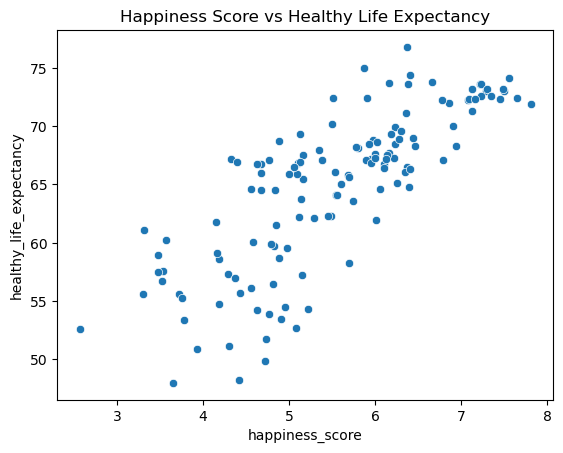

In [70]:
import seaborn as sb
import matplotlib.pyplot as plt


sb.scatterplot(data = combinedLitVal, x='happiness_score', y='healthy_life_expectancy')
plt.title("Happiness Score vs Healthy Life Expectancy")
plt.show()

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.